In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image
from sklearn.model_selection import train_test_split

In [2]:
# installing the tree visualizing utility
!apt-get install graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.42.2-3build2).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.


In [3]:
# connecting to gdrive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
gdrive_path = f"/content/gdrive/MyDrive/stat_ml"

Mounted at /content/gdrive


In [4]:
# reading training dataset to pandas dataframe
data_train = pd.read_csv("/content/gdrive/MyDrive/stat_ml/titanic-train.csv")
# show general dataframe info
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  915 non-null    int64  
 1   Survived     915 non-null    int64  
 2   Pclass       915 non-null    int64  
 3   Name         915 non-null    object 
 4   Gender       915 non-null    object 
 5   Age          738 non-null    float64
 6   SibSp        915 non-null    int64  
 7   Parch        915 non-null    int64  
 8   Ticket       915 non-null    object 
 9   Fare         915 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     914 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 85.9+ KB


In [5]:
# show first 5 rows of the dataframe
data_train.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
1,2,0,3,"Asim, Mr. Adola",male,35.0,0,0,SOTON/O.Q. 3101310,7.0500,NaN,S
2,3,0,3,"Nankoff, Mr. Minko",male,NaN,0,0,349218,7.8958,NaN,S
3,4,0,1,"Thayer, Mr. John Borland",male,49.0,1,1,17421,110.8833,C68,C
4,5,0,3,"Strandberg, Miss. Ida Sofia",female,22.0,0,0,7553,9.8375,NaN,S


In [6]:
# counting total number of gaps per column
data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          713
Embarked         1
dtype: int64

Age and Cabin columns have a significant number of gaps, Embarked has only a single gap.



In [7]:
# common pre-processing procedures for all datasets
def data_preprocess(data):
  # show the size of gender cathegories
  print(f"Gender column original values:\n{data.Gender.value_counts()}")
  # changing cathegorical gender data to numerical 
  data.Gender = data.Gender.apply(lambda gender: 0 if gender == 'male' else 1)
  # show the size of mapped to binary integers gender cathegories
  print(f"Gender column mapped values:\n{data.Gender.value_counts()}")

  # counting total number of gaps in the age column
  print(f"Age column gaps to fill:\t{data.Age.isnull().sum()}")
  # show value to fill the gaps
  print(f"Filling gaps with mean age:\t{data.Age.mean()}")
  # filling gaps of age column with an average value
  data.Age.fillna(data.Age.mean(), inplace=True)
  # check number of gaps in the filled age column 
  print(f"Age column gaps:\t{data.Age.isnull().sum()}")

  return data

In [8]:
# defining the common factor columns
factor_cols = ["Fare", "Pclass", "Gender", "Age", "SibSp"]
# defining the common target column
target_col = "Survived"
# defining model of the decision tree classifier using the entropy criterion to
# measure the quality of a split and limiting the depth of the tree to 3 levels
clf_train = DecisionTreeClassifier(criterion="entropy", max_depth=3)

In [9]:
# preprocessing training dataset
data_train = data_preprocess(data_train)

Gender column original values:
male      597
female    318
Name: Gender, dtype: int64
Gender column mapped values:
0    597
1    318
Name: Gender, dtype: int64
Age column gaps to fill:	177
Filling gaps with mean age:	29.970867208672086
Age column gaps:	0


In [10]:
# setting the target variable
y_target = data_train.loc[:, target_col].values
# setting the factor variables
X_factor = data_train.loc[:, factor_cols].values
y_target.shape, X_factor.shape

((915,), (915, 5))

In [11]:
# training the model on to predict target variable from the input factor variables
clf_train = clf_train.fit(X_factor, y_target)
print(f"Train accuracy: {100 * clf_train.score(X_factor, y_target):.2f}%")

Train accuracy: 81.64%


In [12]:
# writing model to the .dot file storing the decision tree structure 
with open("/content/gdrive/MyDrive/stat_ml/titanic.dot", 'w') as f:
  f = tree.export_graphviz(clf_train, out_file=f, feature_names=factor_cols)

In [13]:
# converting the model structure into image using previously installed graphviz
!dot -Tpng ./gdrive/MyDrive/stat_ml/titanic.dot > ./gdrive/MyDrive/stat_ml/titanic.png

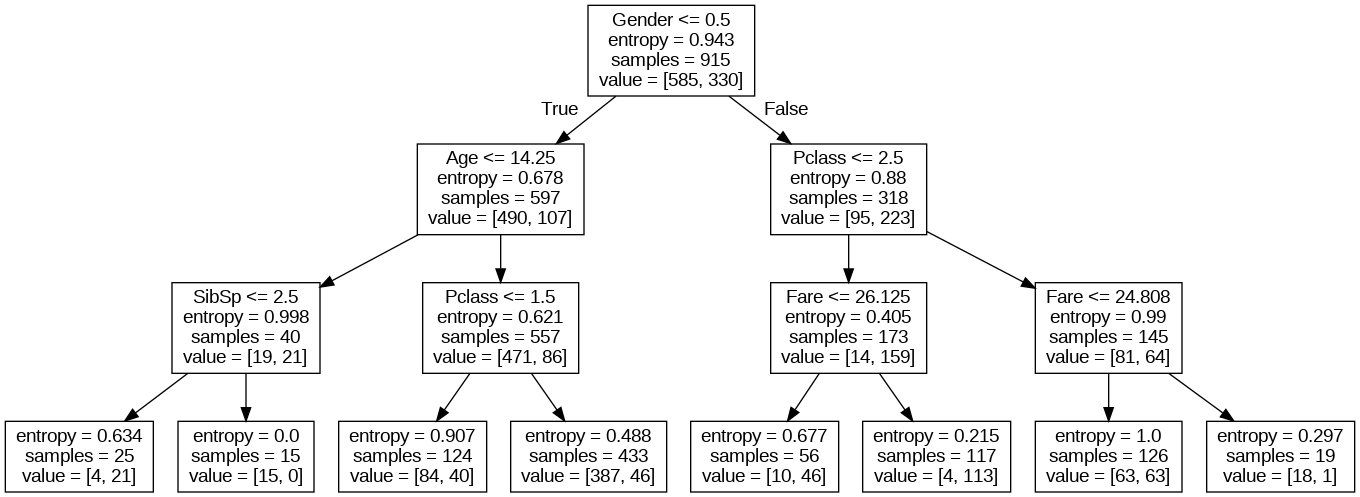

In [14]:
# show the generated image view of the trained model
Image("/content/gdrive/MyDrive/stat_ml/titanic.png")

Initial passengers number - 915 

Males - 597, Females - 318 

Survived - 330, Died - 585

The highest death rate in the group of Males, older than 14 y.o. without 1st class tickets 

The highest survival rate is in the group of Females, with 1st and 2nd class tickets who paid more than 26.125 pounds

In [15]:
# reading testing dataset to pandas dataframe
data_test = pd.read_csv("/content/gdrive/MyDrive/stat_ml/titanic-test.csv")
# show general dataframe info
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  393 non-null    int64  
 1   Survived     393 non-null    int64  
 2   Pclass       393 non-null    int64  
 3   Name         393 non-null    object 
 4   Gender       393 non-null    object 
 5   Age          307 non-null    float64
 6   SibSp        393 non-null    int64  
 7   Parch        393 non-null    int64  
 8   Ticket       393 non-null    object 
 9   Fare         393 non-null    float64
 10  Cabin        93 non-null     object 
 11  Embarked     392 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 37.0+ KB


In [16]:
# counting total number of gaps per column
data_test.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          300
Embarked         1
dtype: int64

Age and Cabin columns have a significant number of gaps, Embarked has only a single gap.

In [17]:
# preprocessing testing dataset
data_test = data_preprocess(data_test)

Gender column original values:
male      245
female    148
Name: Gender, dtype: int64
Gender column mapped values:
0    245
1    148
Name: Gender, dtype: int64
Age column gaps to fill:	86
Filling gaps with mean age:	29.565689576547232
Age column gaps:	0


In [18]:
# setting the test factor variables
X_factor = data_test.loc[:, factor_cols].values
X_factor.shape

(393, 5)

In [19]:
# predicting the target variable 
y_predict = clf_train.predict(X_factor)
# creating new dataframe with estimations for the testing dataset
data_predict = pd.DataFrame({'Est_Survival':y_predict, 'Name':data_test['Name']})
# show first 5 rows of the formed dataframe
data_predict.head()

,Est_Survival,Name
0,0,"Coleridge, Mr. Reginald Charles"
1,1,"Spedden, Mrs. Frederic Oakley (Margaretta Corn..."
2,0,"Windelov, Mr. Einar"
3,1,"Minahan, Miss. Daisy E"
4,0,"Wilkes, Mrs. James (Ellen Needs)"


In [20]:
# reading overall dataset to pandas dataframe
data_all = pd.read_csv("/content/gdrive/MyDrive/stat_ml/titanic_all.csv")
# show general dataframe info
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308 entries, 0 to 1307
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Passenger  1308 non-null   int64  
 1   Survived   1308 non-null   int64  
 2   Pclass     1308 non-null   int64  
 3   Name       1308 non-null   object 
 4   Gender     1308 non-null   object 
 5   Age        1045 non-null   float64
 6   SibSp      1308 non-null   int64  
 7   Parch      1308 non-null   int64  
 8   Ticket     1308 non-null   object 
 9   Fare       1308 non-null   float64
 10  Cabin      295 non-null    object 
 11  Embarked   1306 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [21]:
# merging predictions and actual data per passenger name
data_result = pd.merge(data_predict, data_all[['Name','Survived']], on=['Name'])
# show first 5 rows of the formed dataframe
data_result.head()

,Est_Survival,Name,Survived
0,0,"Coleridge, Mr. Reginald Charles",0
1,1,"Spedden, Mrs. Frederic Oakley (Margaretta Corn...",1
2,0,"Windelov, Mr. Einar",0
3,1,"Minahan, Miss. Daisy E",1
4,0,"Wilkes, Mrs. James (Ellen Needs)",1


In [22]:
acc = np.sum(data_result['Est_Survival'] == data_result['Survived']) / len(data_result.index)
print(f"Test accuracy: {100 * acc:.2f}%")

Test accuracy: 75.89%


In [23]:
# reading specific columns of the overall dataset to pandas dataframe
data = pd.read_csv("/content/gdrive/MyDrive/stat_ml/titanic_all.csv", 
                       usecols=list(factor_cols + [target_col]))
# show general dataframe info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308 entries, 0 to 1307
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1308 non-null   int64  
 1   Pclass    1308 non-null   int64  
 2   Gender    1308 non-null   object 
 3   Age       1045 non-null   float64
 4   SibSp     1308 non-null   int64  
 5   Fare      1308 non-null   float64
dtypes: float64(2), int64(3), object(1)
memory usage: 61.4+ KB


In [24]:
# counting total number of gaps per column
data.isnull().sum()

Survived      0
Pclass        0
Gender        0
Age         263
SibSp         0
Fare          0
dtype: int64

Only Age column has gaps

In [25]:
# preprocessing dataset
data = data_preprocess(data)

Gender column original values:
male      842
female    466
Name: Gender, dtype: int64
Gender column mapped values:
0    842
1    466
Name: Gender, dtype: int64
Age column gaps to fill:	263
Filling gaps with mean age:	29.851834162679427
Age column gaps:	0


In [26]:
# setting the target variable
y_target = data.loc[:, target_col].values
# setting the factor variables
X_factor = data.loc[:, factor_cols].values
y_target.shape, X_factor.shape

((1308,), (1308, 5))

In [27]:
# splitting target and factor variables into train (60%) and test (40%) sequences
# with a preset random seed to enable reproducibility of the model
X_train, X_test, y_train, y_test = train_test_split(X_factor, y_target, 
                                                    test_size=0.4, random_state=1337)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((784, 5), (524, 5), (784,), (524,))

In [28]:
# fitting the model to the train sequences of input factors and output target
clf_train = clf_train.fit(X_train, y_train)
print(f"Train accuracy: {100 * clf_train.score(X_train, y_train):.2f}%")
print(f"Test accuracy: {100 * clf_train.score(X_test, y_test):.2f}%")

Train accuracy: 80.99%
Test accuracy: 80.73%


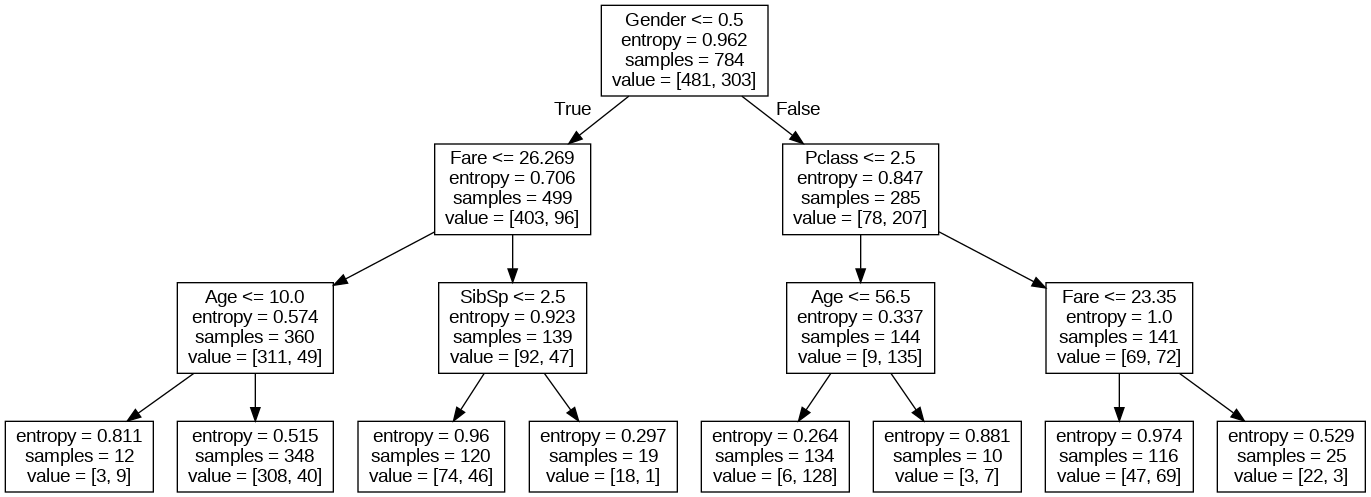

In [29]:
# writing model to the .dot file storing the decision tree structure 
with open("/content/gdrive/MyDrive/stat_ml/titanic.dot", 'w') as f:
  f = tree.export_graphviz(clf_train, out_file=f, feature_names=factor_cols)
# converting the model structure into image using previously installed graphviz
!dot -Tpng ./gdrive/MyDrive/stat_ml/titanic.dot > ./gdrive/MyDrive/stat_ml/titanic.png
# show the generated image view of the trained model
Image("/content/gdrive/MyDrive/stat_ml/titanic.png")


A **Decision Tree Classifier** is a type of supervised machine learning algorithm that is used for classification and regression analysis. The algorithm creates a decision tree by recursively splitting the data into subsets based on the most significant attributes or features in the data, until a stopping criterion is met. The splitting is done in a way that maximizes the difference in the impurity of the subsets before and after the split, with the impurity measured using various criteria listed below.

Decision trees are particularly useful when the relationship between the input features and output variable is nonlinear, and when the data has a large number of features. They can also handle mixed-type data, missing values, and outliers. Decision trees are widely used in fields such as finance, medicine, and engineering for applications such as credit risk assessment, medical diagnosis, and quality control.

Binary decision tree classifiers are built by recursively splitting the dataset into two parts at each node of the tree, based on a binary decision rule on a single feature. This process is repeated for each subset until some stopping criterion is met. The final result is a tree-like structure with decision nodes and leaf nodes, where each leaf node corresponds to a class label.

Binary decision trees are used in various applications such as classification, regression, and outlier detection. They are particularly useful when the dataset contains features that are categorical or binary, or when the relationship between the features and the target variable is not linear.

Non-binary decision trees, on the other hand, can split the dataset into more than two subsets at each node, based on a multiway decision rule. Non-binary trees can be more complex than binary trees and can be used to model more complex relationships between features and the target variable. However, they are also more computationally expensive and prone to overfitting. Therefore, binary decision trees are often preferred in practice. 

The code above demonstrates example of the Binary decision tree classifier.  

There are several advantages of using decision tree classifiers:

* **Interpretability**: Decision trees are easy to interpret and understand, even for non-experts, as they can be visualized and easily explained.

* **Handling both numerical and categorical data**: Decision trees can handle both numerical and categorical data without requiring any data transformation.

* **Non-parametric**: Decision trees are non-parametric, meaning they don't make any assumptions about the underlying distribution of the data.

* **Feature selection**: Decision trees can automatically select the most relevant features for the classification task, which can be useful in high-dimensional datasets.

* **Robustness**: Decision trees are robust to outliers and missing values, as they don't depend on the mean or variance of the data.

* **Scalability**: Decision trees can handle large datasets efficiently, as they can be trained in parallel and distributed environments.

* **Versatility**: Decision trees can be used for both classification and regression tasks, and can be extended to handle multi-class and multi-output problems.

The following are some of the commonly used criteria for branching in decision tree classifiers:

* **Gini Impurity**: This measures the probability of a random sample being wrongly classified based on the distribution of target classes in a particular node.

* **Entropy**: This measures the amount of disorder or randomness in a particular node. It is calculated based on the distribution of target classes in a node.

* **Information Gain**: This measures the reduction in entropy or increase in the homogeneity of target classes after a split.

* **Classification Error**: This measures the probability of misclassification based on the most frequently occurring target class in a particular node.

There are several options for stopping the growth of a decision tree classifier. Some of them are:

* **Maximum depth**: This limits the depth of the tree by setting a maximum number of levels or nodes that the tree can have.

* **Minimum samples per leaf**: This specifies the minimum number of samples that must be present in a leaf node. If a split results in fewer samples than this number, the split is not made.

* **Minimum samples per split**: This specifies the minimum number of samples that must be present in a node before a split can be attempted.

* **Maximum number of leaf nodes**: This limits the number of leaf nodes that the tree can have. If this limit is reached, further splits are not made.

* **Maximum impurity decrease**: This specifies the minimum amount of impurity decrease that must be achieved by a split. If a split does not result in at least this amount of impurity decrease, the split is not made.

These stopping criteria help prevent overfitting and ensure that the tree generalizes well to unseen data.

The `score` method of `sklearn.tree.DecisionTreeClassifier` returns the mean accuracy on the given input data and output labels. The method applies the trained model to the input factors to predict the target values, and then compares the predicted target values to the actual target values to calculate the accuracy. The returned accuracy value is a float between 0 and 1, where 1 represents perfect accuracy and 0 represents no accuracy. 